# Classification Project

<a href="https://colab.research.google.com/github/ErfanRasti/DataMining-Projects/blob/main/ClassificationProject/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank\" href="https://kaggle.com/kernels/welcome?src=https://github.com/ErfanRasti/DataMining-Projects/blob/main/ClassificationProject/main.ipynb">
 <img src="https://kaggle.com/static/images/open-in-kaggle.svg" />
</a>


## Importring libraries


In [46]:
import os
import sys
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from dython.nominal import associations
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score,get_scorer_names
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import rv_discrete

MODELS_DIR = pathlib.Path('./models/')


## Importing the dataset


In [2]:
train_ds = pd.read_csv('./data/Adult_TrainDataset.csv')
test_ds = pd.read_csv('./data/Adult_TestDataset.csv')


In [3]:
train_ds.head()


Age        Work_Class  Final_Weight  Education  Education-Number  \
0   39         State-gov         77516  Bachelors                13   
1   50  Self-emp-not-inc         83311  Bachelors                13   
2   38           Private        215646    HS-grad                 9   
3   53           Private        234721       11th                 7   
4   28           Private        338409  Bachelors                13   

       Marital_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
test_ds.head()


Age Work_Class  Final_Weight     Education  Education-Number  \
0   25    Private        226802          11th                 7   
1   38    Private         89814       HS-grad                 9   
2   28  Local-gov        336951    Assoc-acdm                12   
3   44    Private        160323  Some-college                10   
4   18          ?        103497  Some-college                10   

       Marital_Status         Occupation Relationship   Race     Sex  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married                  ?    Own-child  White  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K

## Data preprocessing


### Cleaning the dataset


In [5]:
train_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
train_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [7]:
test_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [8]:
train_ds.shape


(32561, 15)

In [9]:
for col in train_ds.columns:
    train_ds.drop(train_ds[train_ds[col] == '?'].index, inplace=True)


In [10]:
train_ds.shape


(30162, 15)

In [11]:
test_ds.shape


(16281, 15)

In [12]:
for col in test_ds.columns:
    test_ds.drop(test_ds[test_ds[col] == '?'].index, inplace=True)


In [13]:
test_ds.shape


(15060, 15)

In [14]:
train_ds.isna().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [15]:
test_ds.isna().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

### Visualizing The Dataset


In [16]:
train_ds['Income'].value_counts()


<=50K    22654
>50K      7508
Name: Income, dtype: int64

In [17]:
train_ds.describe()


Age  Final_Weight  Education-Number  Capital_Gain  \
count  30162.000000  3.016200e+04      30162.000000  30162.000000   
mean      38.437902  1.897938e+05         10.121312   1092.007858   
std       13.134665  1.056530e+05          2.549995   7406.346497   
min       17.000000  1.376900e+04          1.000000      0.000000   
25%       28.000000  1.176272e+05          9.000000      0.000000   
50%       37.000000  1.784250e+05         10.000000      0.000000   
75%       47.000000  2.376285e+05         13.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital_Loss  Hours-Per-Week  
count  30162.000000    30162.000000  
mean      88.372489       40.931238  
std      404.298370       11.979984  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

#### Plotting the histogram of the numerical features for training dataset


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final_Weight'}>],
       [<Axes: title={'center': 'Education-Number'}>,
        <Axes: title={'center': 'Capital_Gain'}>],
       [<Axes: title={'center': 'Capital_Loss'}>,
        <Axes: title={'center': 'Hours-Per-Week'}>]], dtype=object)

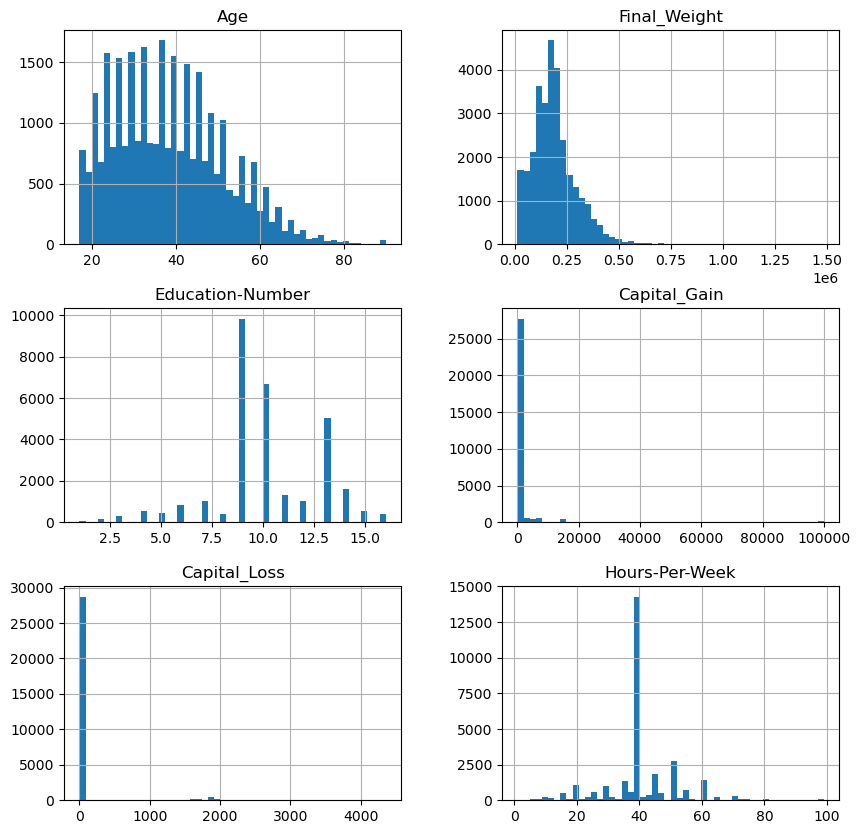

In [18]:
train_ds.hist(bins=50, figsize=(10, 10))


#### Plotting the histogram of the categorical features for training dataset


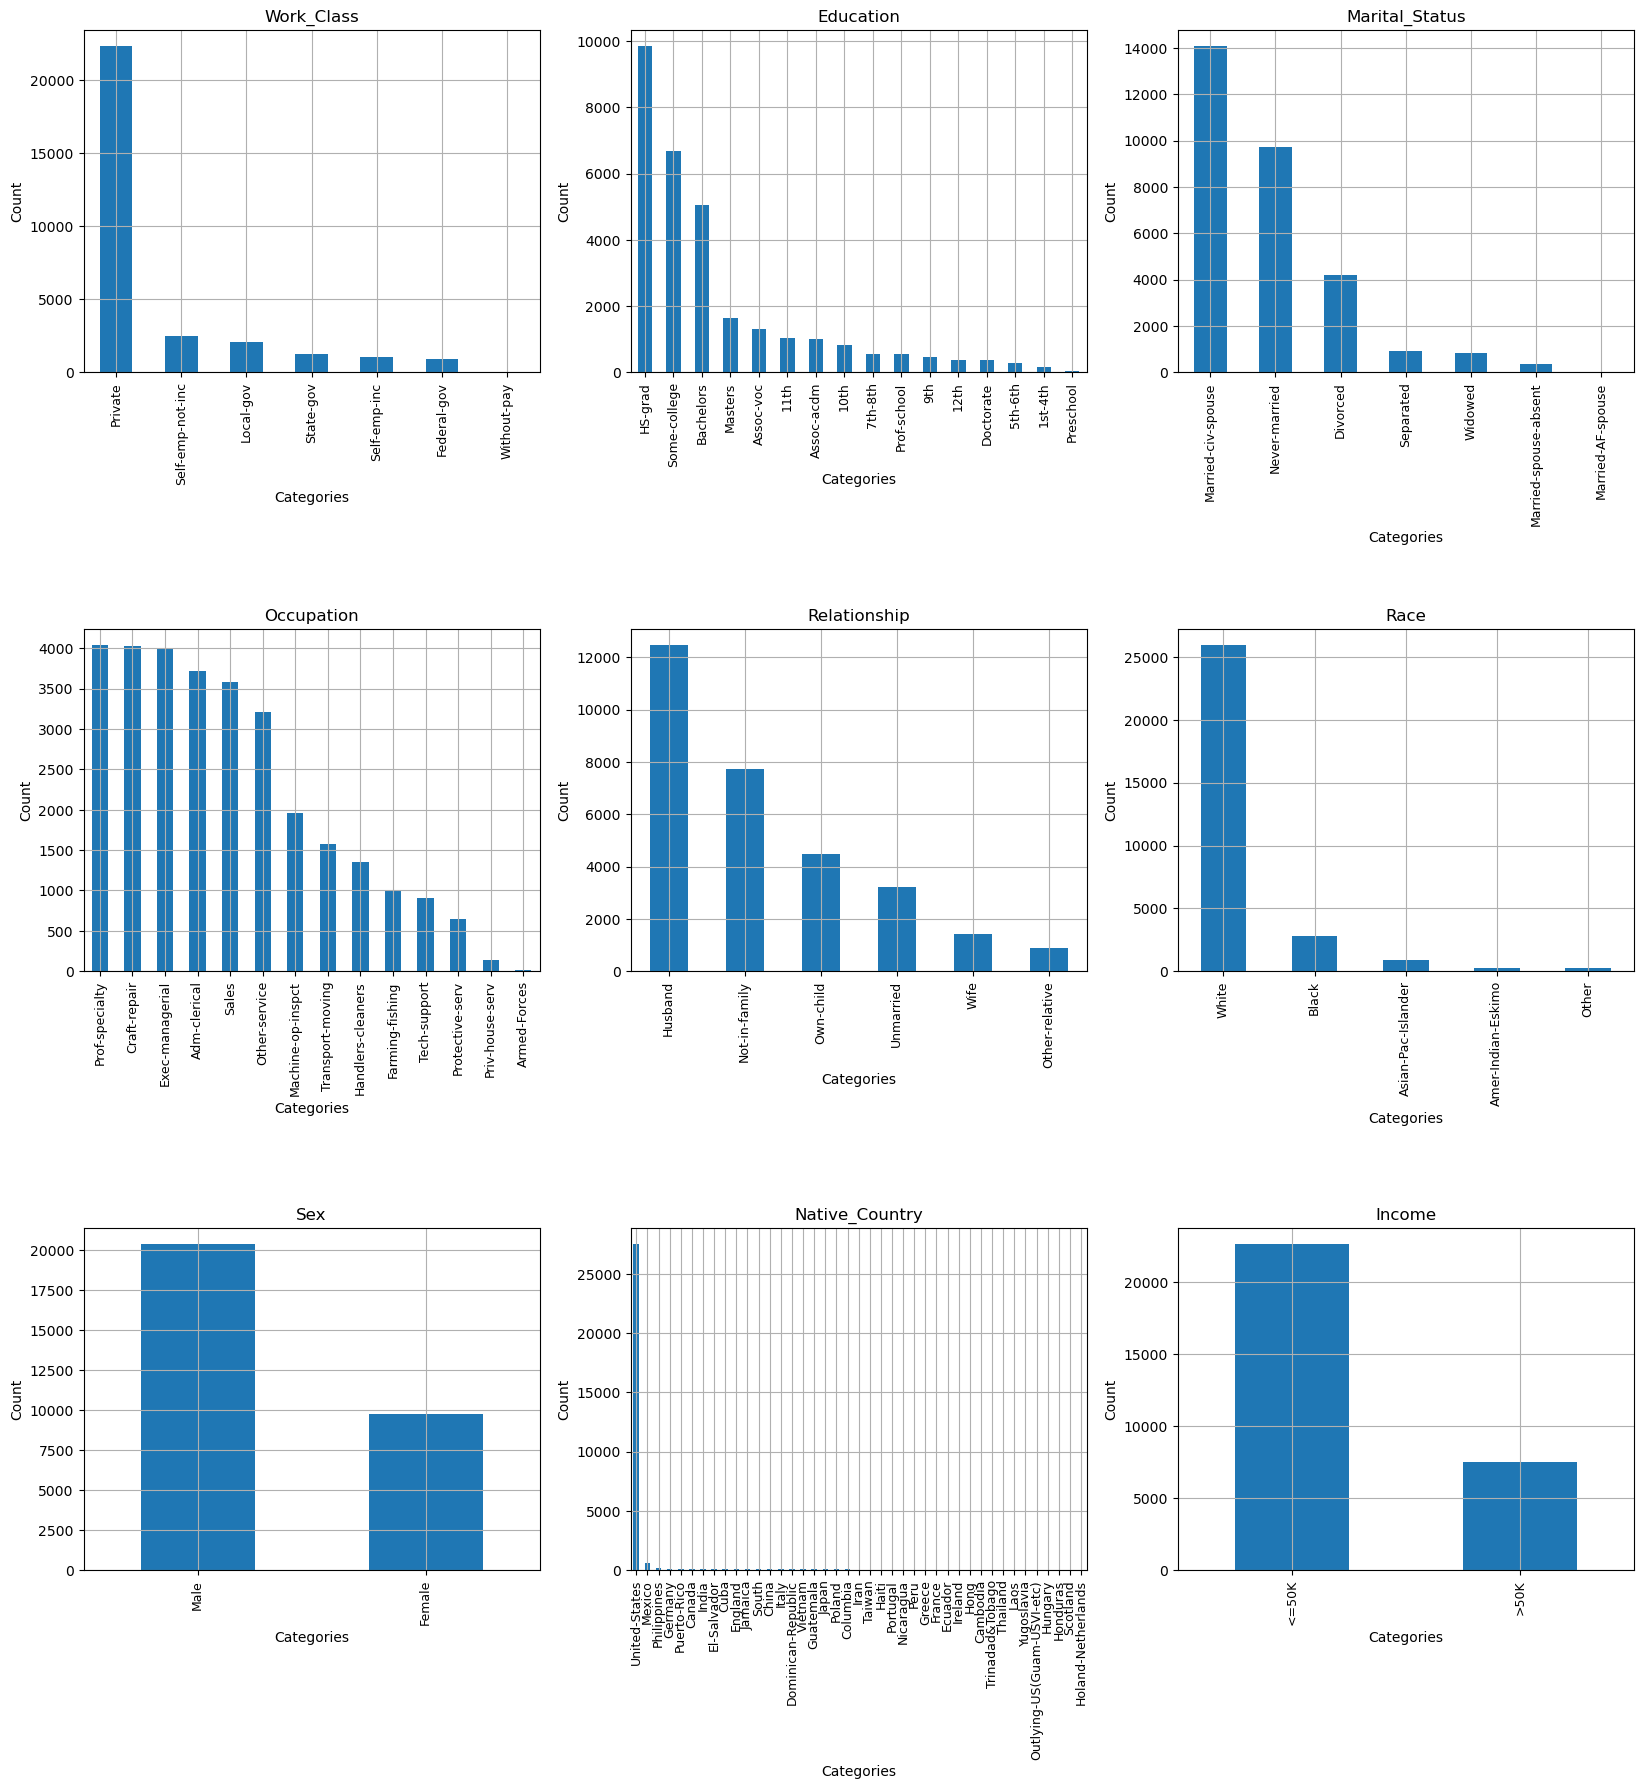

In [19]:
categorical_features = train_ds.select_dtypes(include=['object']).columns

fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.75)
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)

    train_ds[col].value_counts().plot(kind='bar')
    plt.grid(True)
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(fontsize=9)


#### Plotting the pie chart of the categorical features for training dataset


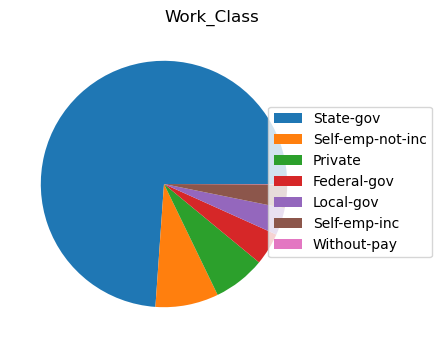

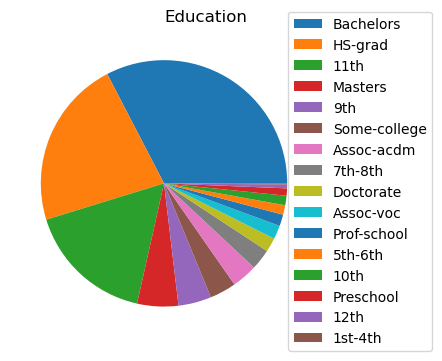

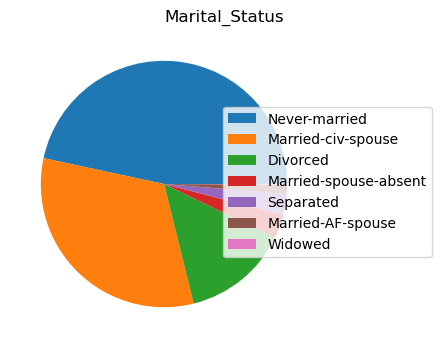

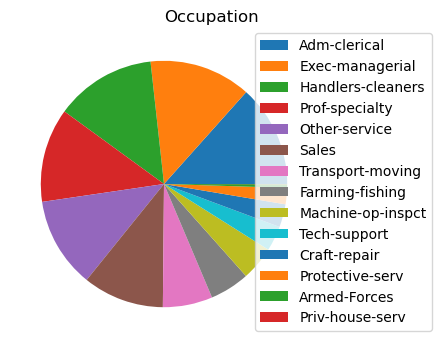

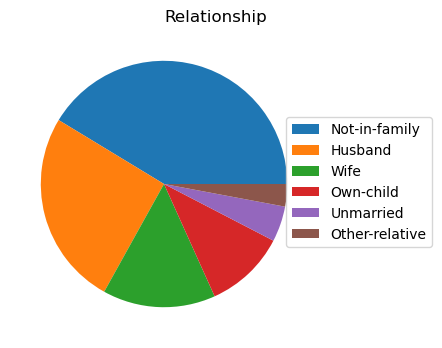

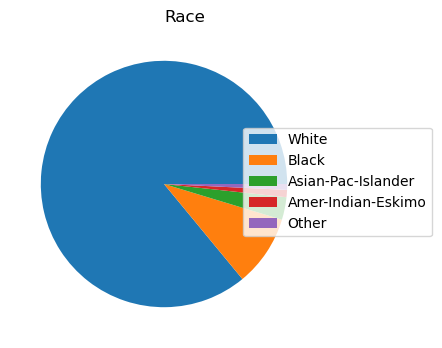

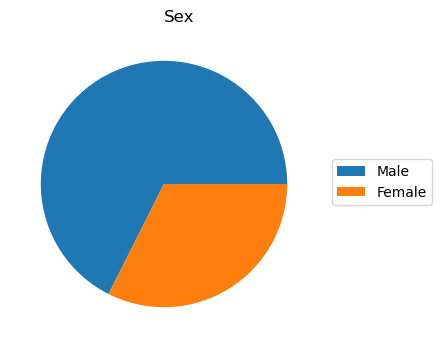

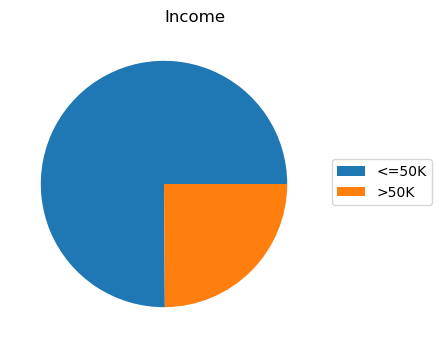

In [20]:
for i, col in enumerate(list(filter(lambda x: x != 'Native_Country', categorical_features))):
    plt.figure(figsize=(4, 4))
    plt.pie(train_ds[col].value_counts())
    title = plt.title(col)
    title.set_ha("left")
    plt.legend(train_ds[col].unique(), bbox_to_anchor=(1.2, 0.5), loc="center right", fontsize=10,
               bbox_transform=plt.gcf().transFigure)


<b>Note:</b> We ignore the pie plot for the feature <i> "Native_Country" </i> because it has too many categories.


#### Plotting the scatter plots


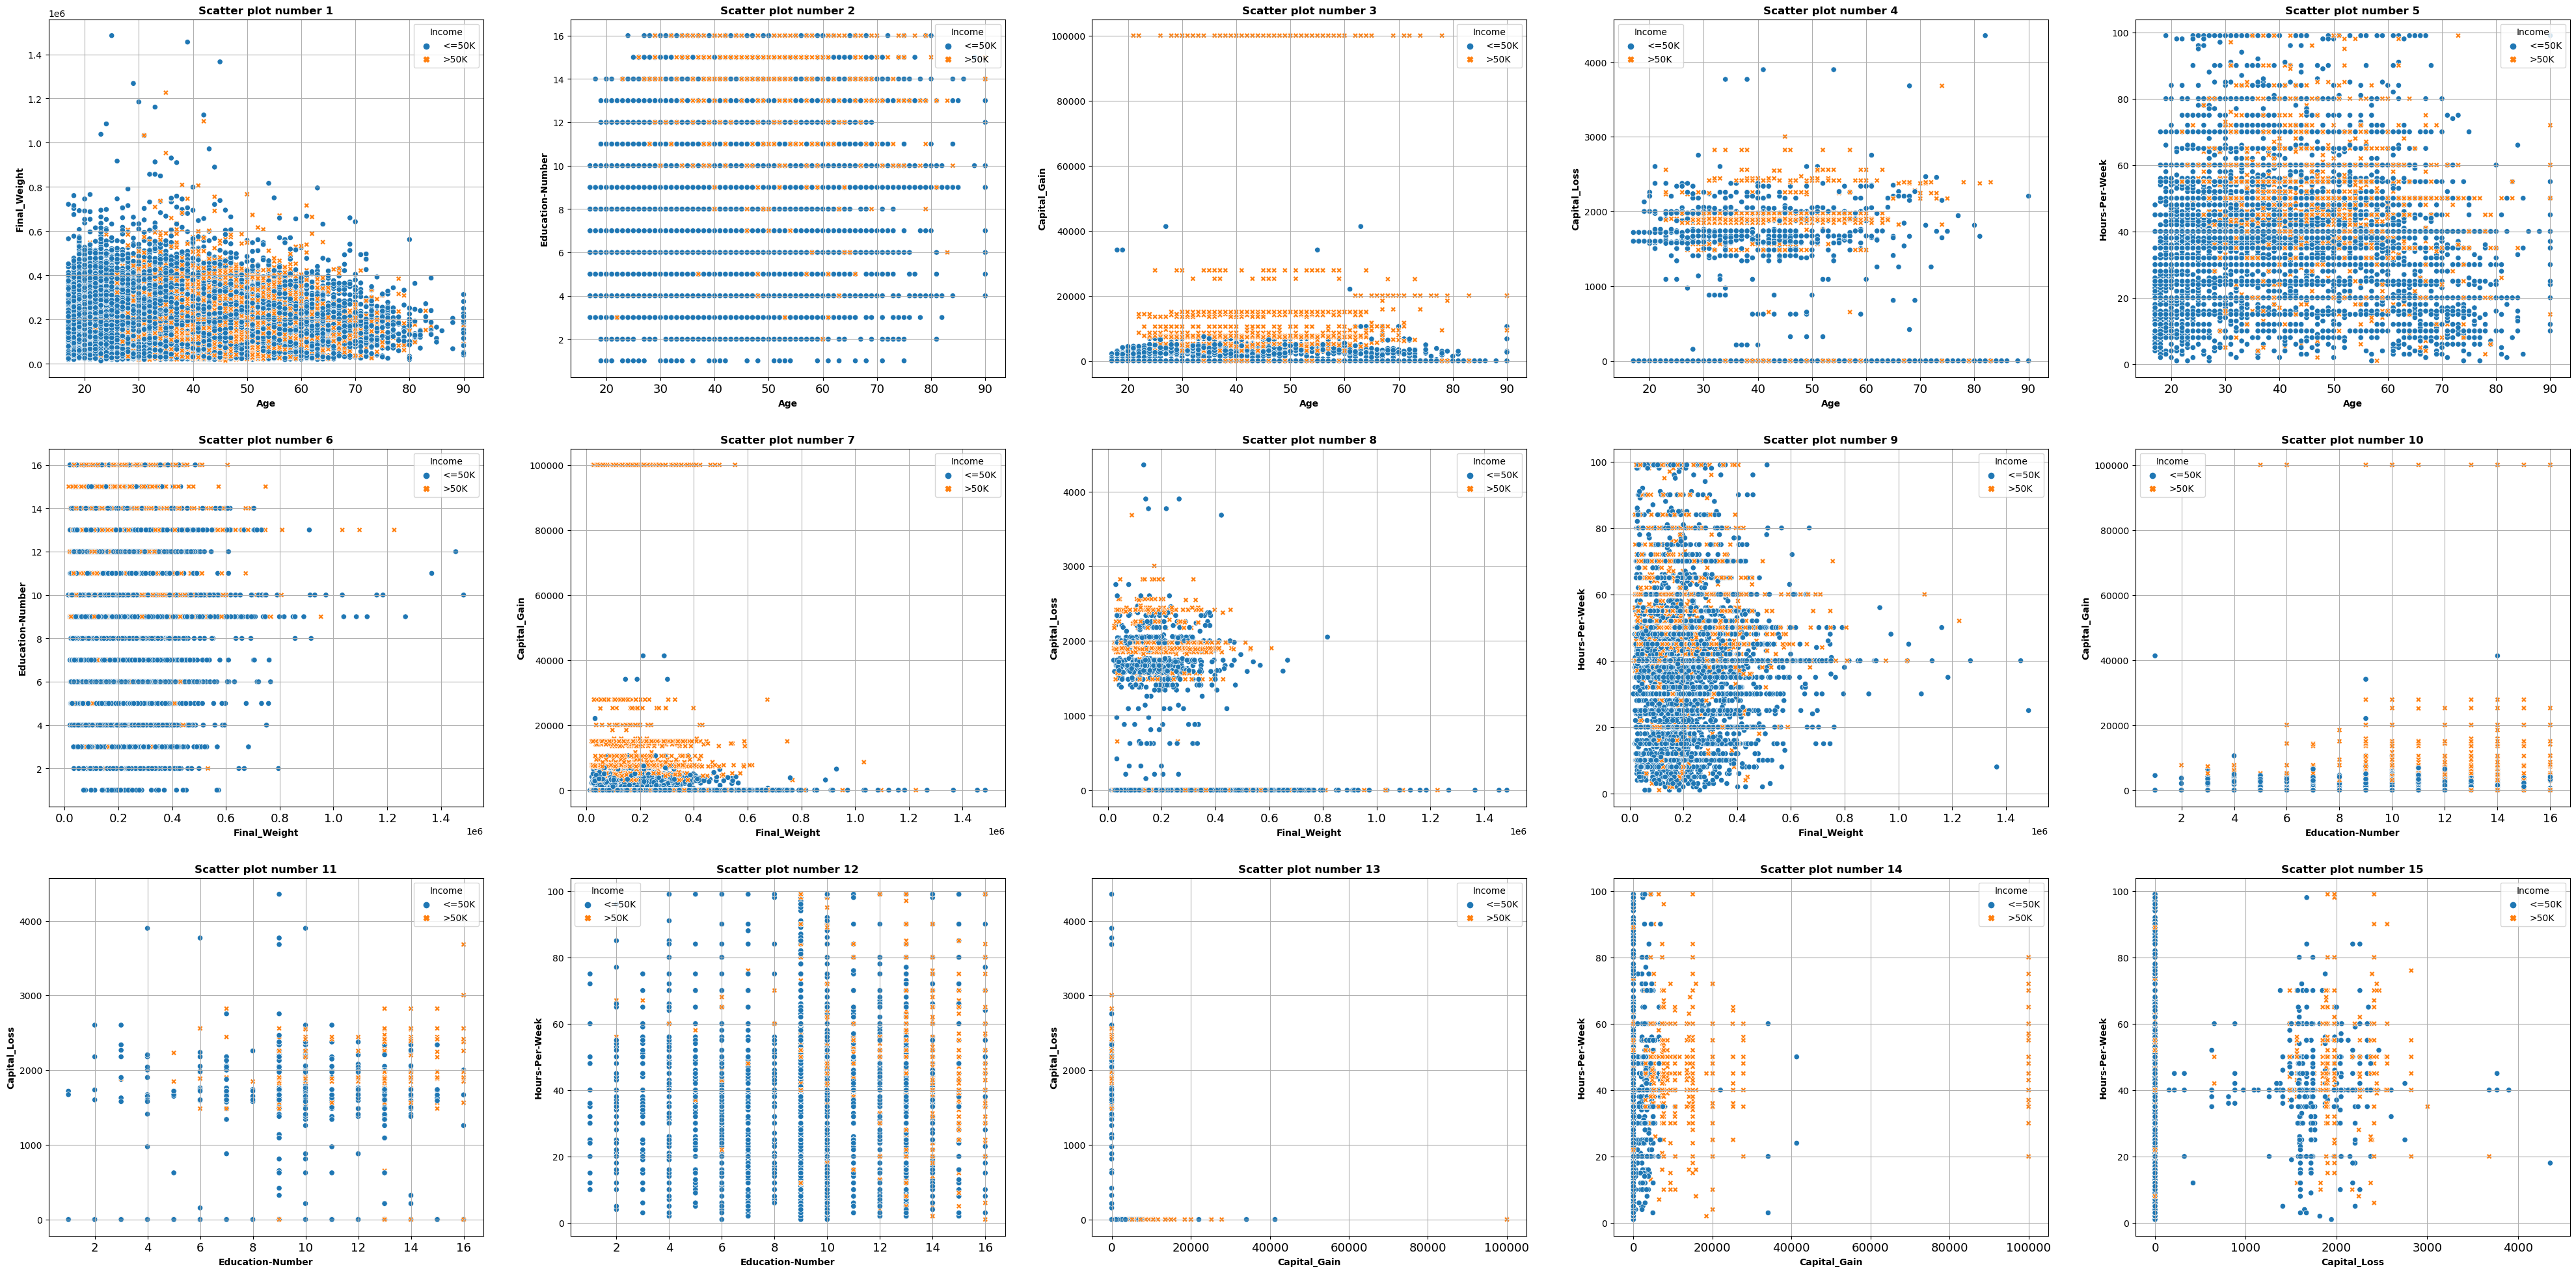

In [21]:
numerical_features = train_ds.select_dtypes(include='int64').columns

train_ds_label = train_ds['Income']
plt_num = 1
fig = plt.figure(figsize=(50, 50))
for i, x_col in enumerate(numerical_features):
    for j, y_col in enumerate(numerical_features[i:]):
        if x_col != y_col:
            plt.subplot(6, 5, plt_num)
            sns.scatterplot(data=train_ds, x=x_col, y=y_col, hue="Income",
                            style="Income")
            plt.xlabel(xlabel=x_col, fontweight="bold")
            plt.ylabel(ylabel=y_col, fontweight="bold")
            plt.title(f"Scatter plot number {plt_num}", fontweight="bold")
            plt.xticks(fontsize=13)
            plt.grid(True)
            plt_num = plt_num + 1


<b>Note:</b>

- there is no significant correlation between features.
- As we can see in <b> scatter plot number 3 </b> the label of samples that their <b> capital_gain </b> is above 10000 is orange.
- As we can see in <b> scatter plot number 12 </b> most of the label of samples that their <b> Education_Number </b> is more that 9 is orange.
- As we can see in <b> scatter plot number 13 </b> most of the label of samples that their <b> Capital_Gain </b> is more that 4000 is orange.


#### Ploting the box plot for the numerical data


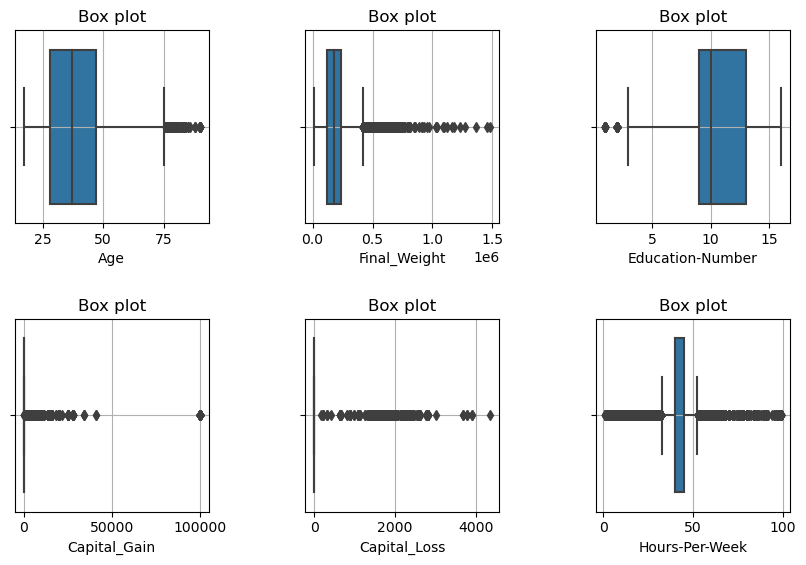

In [22]:
plt_num = 1
fig = plt.figure(2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for x_col in numerical_features:
    plt.subplot(3, 3, plt_num)
    sns.boxplot(data=train_ds, x=x_col, hue="Income")
    plt.title("Box plot")
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt_num = plt_num + 1


<b>Note:</b>

- We should decide how to deal with '**' Capital_Gain '**' and '**' Capital_Loss '**' because most of the samples are zero in these two features. (more than 75% of the samples are 0)


#### Pandas Profiling


In [23]:
ProfileReport(train_ds)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation between features


#### Correlation between numerical data


/tmp/ipykernel_22591/586394980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_num = train_ds.corr()


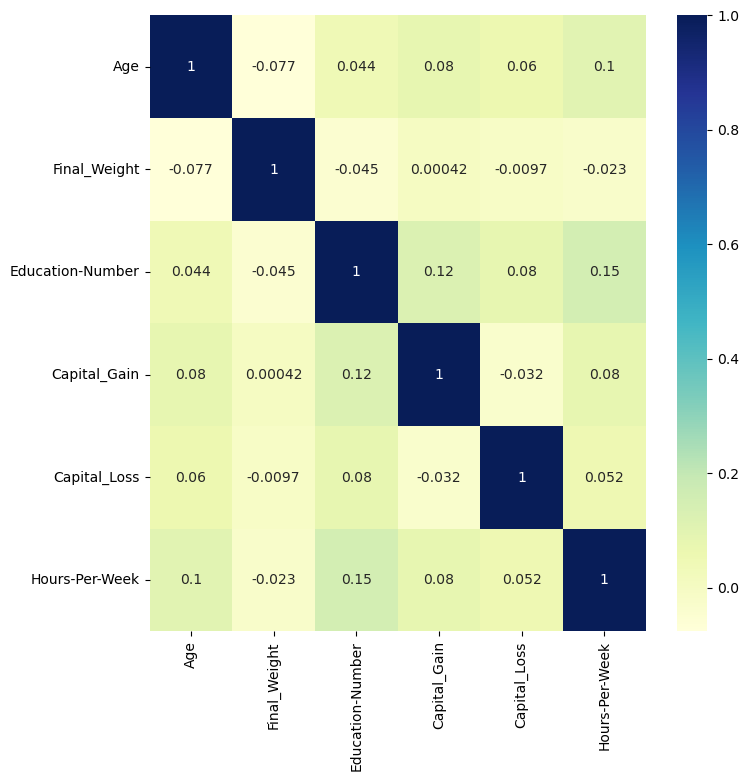

In [16]:
corr_mat_num = train_ds.corr()
plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr_mat_num, annot=True, cmap="YlGnBu")


<b>Note:</b> There is a little correation between ('**' Education-Number '**', '**' Hours-Per-Week '**')


#### Correlation between categorical data


<b>Note</b>: You should to install dython package.


<Figure size 800x800 with 0 Axes>

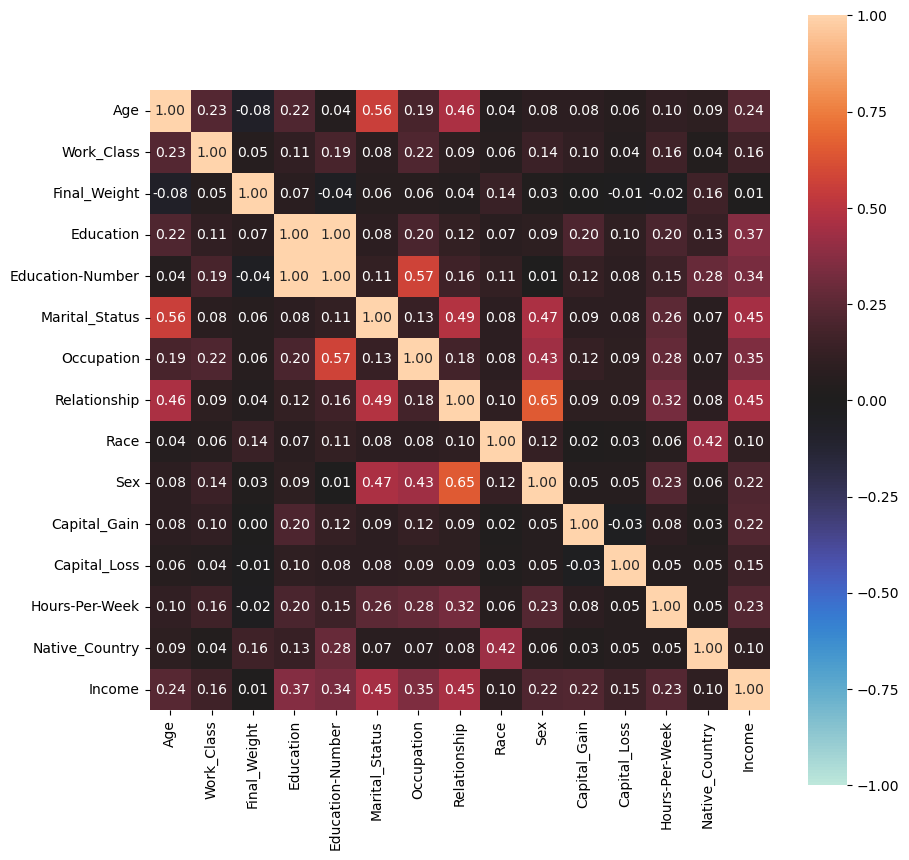

In [17]:
plt.figure(figsize=(8, 8))
corr_mat_complete = associations(
    train_ds,
    filename='./images/complete_correlation.png',
    figsize=(10, 10))


### Preprocessing The dataset based on the correlation between features


In [18]:
train_ds.head()


Age        Work_Class  Final_Weight  Education  Education-Number  \
0   39         State-gov         77516  Bachelors                13   
1   50  Self-emp-not-inc         83311  Bachelors                13   
2   38           Private        215646    HS-grad                 9   
3   53           Private        234721       11th                 7   
4   28           Private        338409  Bachelors                13   

       Marital_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [19]:
train_ds['Education'].value_counts()


HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

In [20]:
train_ds['Education-Number'].value_counts()


9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: Education-Number, dtype: int64

In [21]:
train_ds.drop('Education', axis=1, inplace=True)
test_ds.drop('Education', axis=1, inplace=True)


In [22]:
train_ds.describe()


Age  Final_Weight  Education-Number  Capital_Gain  \
count  30162.000000  3.016200e+04      30162.000000  30162.000000   
mean      38.437902  1.897938e+05         10.121312   1092.007858   
std       13.134665  1.056530e+05          2.549995   7406.346497   
min       17.000000  1.376900e+04          1.000000      0.000000   
25%       28.000000  1.176272e+05          9.000000      0.000000   
50%       37.000000  1.784250e+05         10.000000      0.000000   
75%       47.000000  2.376285e+05         13.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital_Loss  Hours-Per-Week  
count  30162.000000    30162.000000  
mean      88.372489       40.931238  
std      404.298370       11.979984  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

### Preprocessing the data based on the measures of central tendency and dispersion


#### Analyzing the Capital_Gain and Capital_Loss features


In [23]:
train_ds.Capital_Gain.value_counts()


0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: Capital_Gain, Length: 118, dtype: int64

In [24]:
train_ds.Capital_Loss.value_counts()


0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: Capital_Loss, Length: 90, dtype: int64

<b>Note:</b> The most of the samples in these two features are zero, but the correlation between them and target is high so we don't drop these feartures.


#### Analyzing the House-Per-Week feature


In [25]:
train_ds['Hours-Per-Week'].value_counts()


40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: Hours-Per-Week, Length: 94, dtype: int64

This feature has lots of value that are 40. These values are close to the mean of this feature. So we don't need to do anything with this feature.


### Preprocessing the categorical features


In [26]:
categorical_features = train_ds.select_dtypes(include=['object']).columns


In [27]:
for col in categorical_features:
    print('+++++++++++++++++++++++++++++++++++++')
    print(col + ' classes:')
    print(train_ds[col].value_counts())


+++++++++++++++++++++++++++++++++++++
Work_Class classes:
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Work_Class, dtype: int64
+++++++++++++++++++++++++++++++++++++
Marital_Status classes:
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_Status, dtype: int64
+++++++++++++++++++++++++++++++++++++
Occupation classes:
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces       

These features are okay to work with. The only important is the <i>"Native_Country"</i> feature which lots of its values are United-States. We decided to don't delete this feature because it may be important for the model and that samples which their <i>"Native_Country"</i> is not United-States may have a different label.


### Shuffling and reseting the index of the data

We should reset the index of the dataset because we deleted some rows.


In [28]:
train_ds = train_ds.sample(frac=1, random_state=42).reset_index(drop=True)
test_ds = test_ds.sample(frac=1, random_state=42).reset_index(drop=True)

### Separating the labels from the data


In [29]:
train_targets = train_ds['Income']
train_ds.drop(['Income'], axis=1, inplace=True)

test_targets = test_ds['Income']
test_ds.drop(['Income'], axis=1, inplace=True)


### Encoding the categorical features and labels


#### Label encoding for the training set


In [30]:
categorical_features = train_ds.select_dtypes(include=['object']).columns
label_encoder_list = {feature: LabelEncoder()
                      for feature in categorical_features}

train_ds_labelEncoded = train_ds.copy()
for feature in categorical_features:
    train_ds_labelEncoded[feature] = label_encoder_list[feature].fit_transform(
        train_ds_labelEncoded[feature])

train_ds_labelEncoded


Age  Work_Class  Final_Weight  Education-Number  Marital_Status  \
0       28           2         76714                15               4   
1       41           2        178431                 9               2   
2       53           2        290640                 9               2   
3       31           2        215297                 9               2   
4       34           1        188682                13               3   
...    ...         ...           ...               ...             ...   
30157   40           2         67852                 9               0   
30158   41           4        120539                10               2   
30159   37           2        176900                 9               2   
30160   56           4         51662                 7               2   
30161   54           3        196328                13               2   

       Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0               9             1     4    1             0             0   
1               2             0     1    1             0             0   
2               7             0     4    1             0             0   
3               2             0     4    1             0             0   
4               9             1     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
30157          13             1     4    1             0             0   
30158           6             0     4    1          3103             0   
30159           2             0     4    1             0             0   
30160           7             5     4    0             0             0   
30161          11             0     2    1             0             0   

       Hours-Per-Week  Native_Country  
0                  55              38  
1                  40              35  
2                  50              10  
3                  45              38  
4                  40              38  
...               ...             ...  
30157              35              38  
30158              40              38  
30159              99              38  
30160              40              38  
30161              40              22  

[30162 rows x 13 columns]

In [31]:
target_encoder = LabelEncoder()
train_targets_encoded = target_encoder.fit_transform(train_targets)

train_targets_encoded


array([1, 0, 1, ..., 1, 0, 0])

#### Label Encoding for the test set


In [32]:
test_ds_labelEncoded = test_ds.copy()
for feature in categorical_features:
    test_ds_labelEncoded[feature] = label_encoder_list[feature].transform(
        test_ds_labelEncoded[feature])

test_ds_labelEncoded


Age  Work_Class  Final_Weight  Education-Number  Marital_Status  \
0       35           2        191807                11               2   
1       43           3        504423                14               2   
2       36           2         48520                10               0   
3       53           2        221672                 8               2   
4       20           2         95989                10               4   
...    ...         ...           ...               ...             ...   
15055   59           1        173992                 9               5   
15056   24           2        251603                10               4   
15057   43           2        325461                10               0   
15058   57           2        186361                11               4   
15059   48           2        233511                 9               2   

       Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0              12             0     4    1             0             0   
1               3             0     1    1             0             0   
2               7             4     4    0             0             0   
3               7             0     4    1             0             0   
4              11             3     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
15055           0             4     4    0             0             0   
15056           7             4     4    0             0             0   
15057          12             1     4    1             0             0   
15058           7             3     4    0             0             0   
15059           2             0     4    1             0             0   

       Hours-Per-Week  Native_Country  
0                  40              38  
1                  60              23  
2                  40              38  
3                  40              38  
4                  35              38  
...               ...             ...  
15055              35              38  
15056              20              38  
15057              45              38  
15058              40              38  
15059              40              38  

[15060 rows x 13 columns]

In [33]:
test_targets_encoded = target_encoder.transform(test_targets)

test_targets_encoded


array([0, 1, 0, ..., 0, 0, 1])

#### One-hot encoding the training set


In [34]:
onehot_encoders_list = {feature: OneHotEncoder()
                        for feature in categorical_features}

train_ds_onehotEncoded = train_ds.copy()
for feature in categorical_features:
    enocded_column = onehot_encoders_list[feature].fit_transform(
        train_ds_onehotEncoded[[feature]])

    print('*************************************')
    print('Processing the faeture '+feature)
    print(onehot_encoders_list[feature].categories_[0])
    train_ds_onehotEncoded.drop(columns=[feature], inplace=True)
    train_ds_onehotEncoded = pd.concat([train_ds_onehotEncoded, pd.DataFrame(
        enocded_column.toarray(),
        columns=feature+'_'+onehot_encoders_list[feature].categories_[0])],
        axis=1)

train_ds_onehotEncoded


*************************************
Processing the faeture Work_Class
['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
*************************************
Processing the faeture Marital_Status
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
*************************************
Processing the faeture Occupation
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
*************************************
Processing the faeture Relationship
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
*************************************
Processing the faeture Race
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
*************************************
Proce

Age  Final_Weight  Education-Number  Capital_Gain  Capital_Loss  \
0       28         76714                15             0             0   
1       41        178431                 9             0             0   
2       53        290640                 9             0             0   
3       31        215297                 9             0             0   
4       34        188682                13             0             0   
...    ...           ...               ...           ...           ...   
30157   40         67852                 9             0             0   
30158   41        120539                10          3103             0   
30159   37        176900                 9             0             0   
30160   56         51662                 7             0             0   
30161   54        196328                13             0             0   

       Hours-Per-Week  Work_Class_Federal-gov  Work_Class_Local-gov  \
0                  55                     0.0                   0.0   
1                  40                     0.0                   0.0   
2                  50                     0.0                   0.0   
3                  45                     0.0                   0.0   
4                  40                     0.0                   1.0   
...               ...                     ...                   ...   
30157              35                     0.0                   0.0   
30158              40                     0.0                   0.0   
30159              99                     0.0                   0.0   
30160              40                     0.0                   0.0   
30161              40                     0.0                   0.0   

       Work_Class_Private  Work_Class_Self-emp-inc  ...  \
0                     1.0                      0.0  ...   
1                     1.0                      0.0  ...   
2                     1.0                      0.0  ...   
3                     1.0                      0.0  ...   
4                     0.0                      0.0  ...   
...                   ...                      ...  ...   
30157                 1.0                      0.0  ...   
30158                 0.0                      0.0  ...   
30159                 1.0                      0.0  ...   
30160                 0.0                      0.0  ...   
30161                 0.0                      1.0  ...   

       Native_Country_Portugal  Native_Country_Puerto-Rico  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
30157                      0.0                         0.0   
30158                      0.0                         0.0   
30159                      0.0                         0.0   
30160                      0.0                         0.0   
30161                      0.0                         0.0   

       Native_Country_Scotland  Native_Country_South  Native_Country_Taiwan  \
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    1.0   
2                          0.0                   0.0                    0.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   
...                        ...                   ...                    ...   
30157                      0.0                   0.0                    0.0   
30158                      0.0                   0.0                    0.0   
30159                      0.0                   0.0                    0.0   
30160                

#### One-hot encoding the test set


In [35]:
test_ds_onehotEncoded = test_ds.copy()
for feature in categorical_features:
    test_ds_onehotEncoded = pd.concat([test_ds_onehotEncoded, pd.DataFrame(
        onehot_encoders_list[feature].transform(
            test_ds_onehotEncoded[[feature]]).toarray(),
        columns=feature+'_'+onehot_encoders_list[feature].categories_[0])],
        axis=1)
    test_ds_onehotEncoded.drop(columns=[feature], inplace=True)

test_ds_onehotEncoded


Age  Final_Weight  Education-Number  Capital_Gain  Capital_Loss  \
0       35        191807                11             0             0   
1       43        504423                14             0             0   
2       36         48520                10             0             0   
3       53        221672                 8             0             0   
4       20         95989                10             0             0   
...    ...           ...               ...           ...           ...   
15055   59        173992                 9             0             0   
15056   24        251603                10             0             0   
15057   43        325461                10             0             0   
15058   57        186361                11             0             0   
15059   48        233511                 9             0             0   

       Hours-Per-Week  Work_Class_Federal-gov  Work_Class_Local-gov  \
0                  40                     0.0                   0.0   
1                  60                     0.0                   0.0   
2                  40                     0.0                   0.0   
3                  40                     0.0                   0.0   
4                  35                     0.0                   0.0   
...               ...                     ...                   ...   
15055              35                     0.0                   1.0   
15056              20                     0.0                   0.0   
15057              45                     0.0                   0.0   
15058              40                     0.0                   0.0   
15059              40                     0.0                   0.0   

       Work_Class_Private  Work_Class_Self-emp-inc  ...  \
0                     1.0                      0.0  ...   
1                     0.0                      1.0  ...   
2                     1.0                      0.0  ...   
3                     1.0                      0.0  ...   
4                     1.0                      0.0  ...   
...                   ...                      ...  ...   
15055                 0.0                      0.0  ...   
15056                 1.0                      0.0  ...   
15057                 1.0                      0.0  ...   
15058                 1.0                      0.0  ...   
15059                 1.0                      0.0  ...   

       Native_Country_Portugal  Native_Country_Puerto-Rico  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
15055                      0.0                         0.0   
15056                      0.0                         0.0   
15057                      0.0                         0.0   
15058                      0.0                         0.0   
15059                      0.0                         0.0   

       Native_Country_Scotland  Native_Country_South  Native_Country_Taiwan  \
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    0.0   
2                          0.0                   0.0                    0.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   
...                        ...                   ...                    ...   
15055                      0.0                   0.0                    0.0   
15056                      0.0                   0.0                    0.0   
15057                      0.0                   0.0                    0.0   
15058                

### Feature selection using random forest

In [36]:
rnd_frst_clf = RandomForestClassifier(random_state=42,
                                     n_estimators=1000,
                                     max_features=1,
                                     max_depth=100,
                                     n_jobs=-1)

rnd_frst_clf.fit(train_ds_labelEncoded, train_targets_encoded)

RandomForestClassifier(max_depth=100, max_features=1, n_estimators=1000,
                       n_jobs=-1, random_state=42)

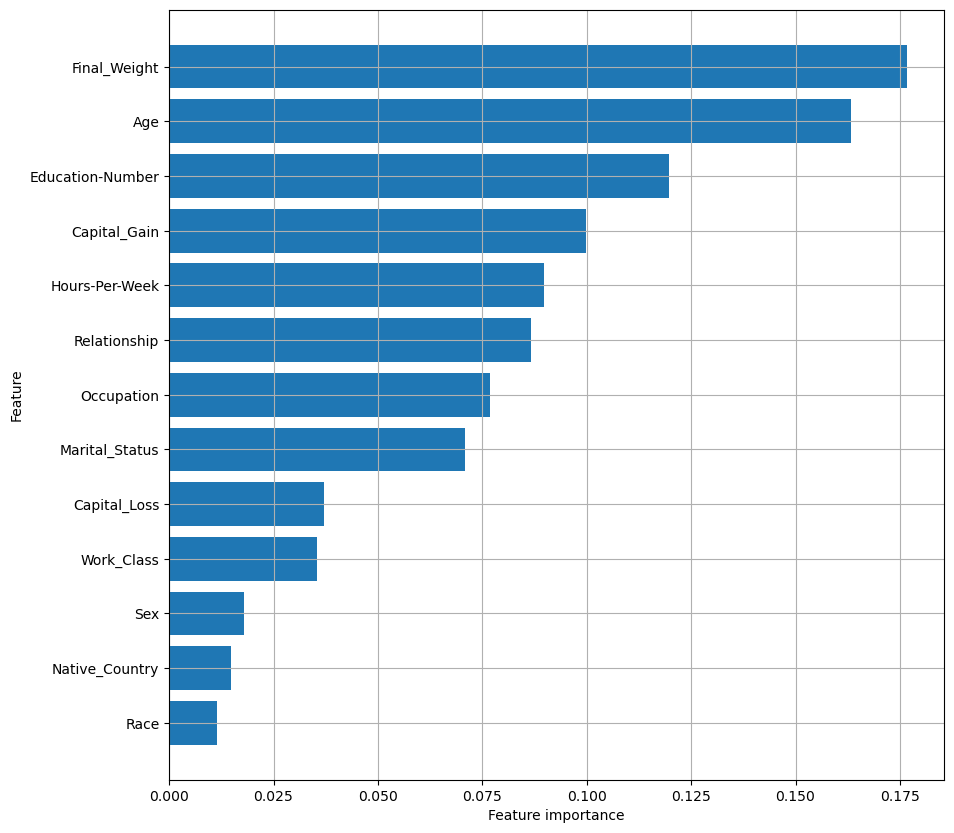

In [37]:
feat_ind = list(zip(train_ds_labelEncoded.columns,
                    rnd_frst_clf.feature_importances_))
feat_ind.sort(key=lambda x: x[1])
fig = plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in feat_ind[-20:]], [x[1] for x in feat_ind[-20:]])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.grid()
plt.show()

Filter features with importance higher than 0.02.

In [38]:
selected_features = [x[0] for x in feat_ind if x[1] > 0.02]
train_ds_labelEncoded = train_ds_labelEncoded[selected_features]
test_ds_labelEncoded = test_ds_labelEncoded[selected_features]


In [39]:
rnd_frst_clf = RandomForestClassifier(random_state=42,
                                     n_estimators=1000,
                                     max_features=1,
                                     max_depth=100,
                                     n_jobs=-1)

rnd_frst_clf.fit(train_ds_onehotEncoded, train_targets_encoded)

RandomForestClassifier(max_depth=100, max_features=1, n_estimators=1000,
                       n_jobs=-1, random_state=42)

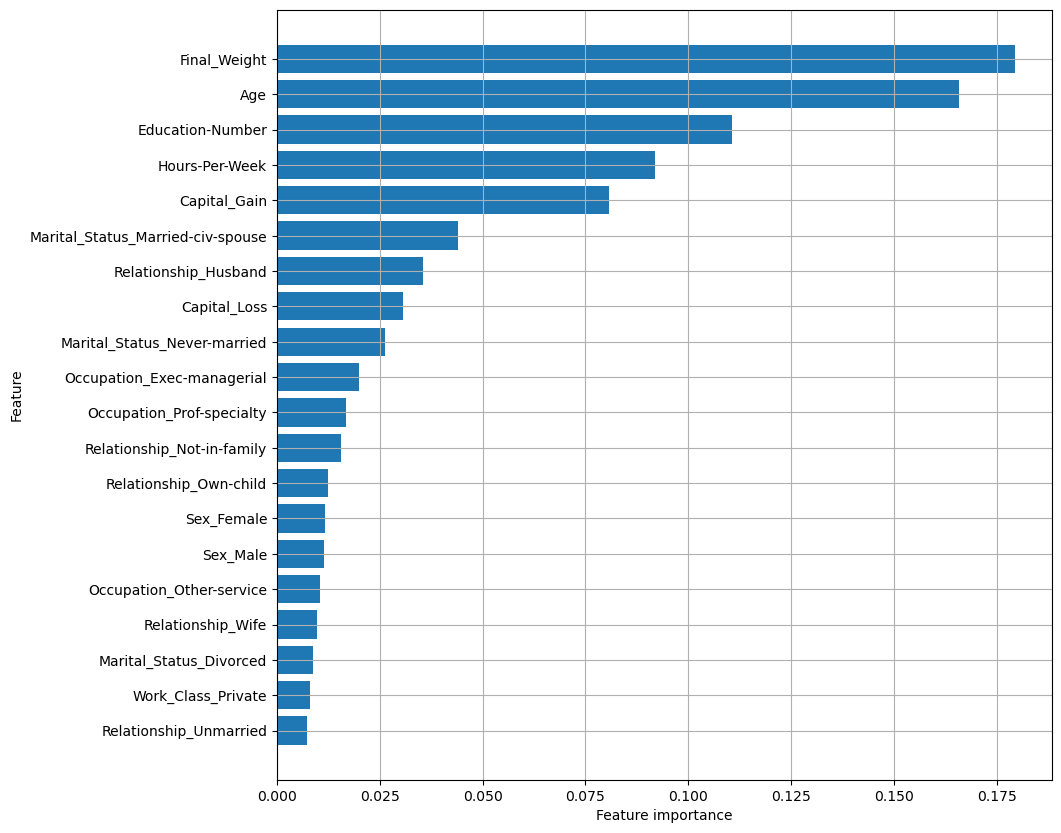

In [40]:
feat_ind = list(zip(train_ds_onehotEncoded.columns,
                    rnd_frst_clf.feature_importances_))
feat_ind.sort(key=lambda x: x[1])
fig = plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in feat_ind[-20:]], [x[1] for x in feat_ind[-20:]])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


In [41]:
selected_features = [x[0] for x in feat_ind if x[1] > 0.01]
train_ds_onehotEncoded = train_ds_onehotEncoded[selected_features]
test_ds_onehotEncoded = test_ds_onehotEncoded[selected_features]


### Standardizing the data


In [42]:
train_ds_labelEncoded = train_ds_labelEncoded.astype('float32')
train_ds_onehotEncoded = train_ds_onehotEncoded.astype('float32')

test_ds_labelEncoded = test_ds_labelEncoded.astype('float32')
test_ds_onehotEncoded = test_ds_onehotEncoded.astype('float32')

train_targets_encoded = train_targets_encoded.astype('float32')
test_targets_encoded = test_targets_encoded.astype('float32')


In [43]:
train_ds_labelEncoded_scaled = np.array(train_ds_labelEncoded)
train_ds_labelEncoded_mean = train_ds_labelEncoded_scaled.mean(axis=0)
train_ds_labelEncoded_scaled -= train_ds_labelEncoded_mean
train_ds_labelEncoded_std = train_ds_labelEncoded_scaled.std(axis=0)
train_ds_labelEncoded_scaled /= train_ds_labelEncoded_std

test_ds_labelEncoded_scaled = np.array(test_ds_labelEncoded)
test_ds_labelEncoded_scaled -= train_ds_labelEncoded_mean
test_ds_labelEncoded_scaled /= train_ds_labelEncoded_std


In [44]:
train_ds_onehotEncoded_scaled = np.array(train_ds_onehotEncoded)
train_ds_onehotEncoded_mean = train_ds_onehotEncoded_scaled.mean(axis=0)
train_ds_onehotEncoded_scaled -= train_ds_onehotEncoded_mean
train_ds_onehotEncoded_std = train_ds_onehotEncoded_scaled.std(axis=0)
train_ds_onehotEncoded_scaled /= train_ds_onehotEncoded_std

test_ds_onehotEncoded_scaled = np.array(test_ds_onehotEncoded)
test_ds_onehotEncoded_scaled -= train_ds_onehotEncoded_mean
test_ds_onehotEncoded_scaled /= train_ds_onehotEncoded_std


## Training the models


### Training the K nearest neighbors classifier


#### Grid search on the KNN model for label encoded data

In [53]:

grid_param_dist = {
    'n_neighbors': rv_discrete(
        values=(np.arange(1, 100, step=2), np.ones(50)/50)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'cosine', 'manhattan'],
    'p': [1, 2, float('inf')]
}

knnClassifier_labelEncoded = KNeighborsClassifier()
knnClassifier_labelEncoded_rndGridSearch = RandomizedSearchCV(
    estimator=knnClassifier_labelEncoded,
    param_distributions=grid_param_dist,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
    refit='accuracy',
    n_iter=20,
    verbose=5,
    n_jobs=-1,
    return_train_score=True
)


In [58]:
if os.path.isfile(MODELS_DIR/'knnClassifier_labelEncoded_rndGridSearch.pkl'):
    knnClassifier_labelEncoded_rndGridSearch = joblib.load(
        MODELS_DIR/'knnClassifier_labelEncoded_rndGridSearch.pkl')

else:
    knnClassifier_labelEncoded_rndGridSearch.fit(train_ds_labelEncoded_scaled,
                                               train_targets_encoded)

    joblib.dump(knnClassifier_labelEncoded_rndGridSearch,
                MODELS_DIR/'knnClassifier_labelEncoded_rndGridSearch.pkl')


In [63]:
knnClassifier_labelEncoded_rndGridSearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 47, 'p': 1, 'weights': 'distance'}

In [67]:
rndCV_res = knnClassifier_labelEncoded_rndGridSearch.cv_results_
rndCV_res_df = pd.DataFrame(rndCV_res)
rndCV_res_df.sort_values(by='rank_test_accuracy', inplace=True)
rndCV_res_df[['mean_test_accuracy', 'mean_test_f1', 'mean_test_roc_auc',
                'mean_test_precision', 'mean_test_recall', 'params']]

mean_test_accuracy  mean_test_f1  mean_test_roc_auc  mean_test_precision  \
3             0.841556      0.649290           0.894229             0.722937   
19            0.840528      0.649352           0.892738             0.717192   
18            0.840329      0.645978           0.894643             0.720724   
15            0.840329      0.645089           0.894232             0.721986   
8             0.839268      0.641962           0.894650             0.720279   
4             0.839003      0.640808           0.894310             0.720410   
9             0.838970      0.636479           0.893799             0.726429   
14            0.838970      0.636525           0.893807             0.726310   
0             0.837279      0.639967           0.890467             0.712162   
13            0.836848      0.638813           0.890513             0.711351   
6             0.836781      0.635892           0.889535             0.714881   
10            0.836715      0.634745           0.889869             0.716023   
2             0.835488      0.629211           0.889094             0.716537   
7             0.835223      0.628909           0.888407             0.715680   
5             0.834461      0.636785           0.886433             0.701346   
16            0.834129      0.634568           0.886696             0.702359   
1             0.834030      0.640703           0.885252             0.694683   
12            0.833665      0.638557           0.885840             0.695353   
11            0.826271      0.631811           0.854558             0.668529   
17            0.816159      0.618119           0.823193             0.639894   

    mean_test_recall                                             params  
3           0.589371  {'metric': 'manhattan', 'n_neighbors': 47, 'p'...  
19          0.593367  {'metric': 'manhattan', 'n_neighbors': 31, 'p'...  
18          0.585375  {'metric': 'manhattan', 'n_neighbors': 59, 'p'...  
15          0.583112  {'metric': 'manhattan', 'n_neighbors': 47, 'p'...  
8           0.579116  {'metric': 'manhattan', 'n_neighbors': 71, 'p'...  
4           0.577118  {'metric': 'minkowski', 'n_neighbors': 61, 'p'...  
9           0.566463  {'metric': 'manhattan', 'n_neighbors': 85, 'p'...  
14          0.566596  {'metric': 'manhattan', 'n_neighbors': 83, 'p'...  
0           0.581114  {'metric': 'minkowski', 'n_neighbors': 37, 'p'...  
13          0.579782  {'metric': 'euclidean', 'n_neighbors': 39, 'p'...  
6           0.572723  {'metric': 'minkowski', 'n_neighbors': 55, 'p'...  
10          0.570191  {'metric': 'euclidean', 'n_neighbors': 77, 'p'...  
2           0.561002  {'metric': 'euclidean', 'n_neighbors': 97, 'p'...  
7           0.561001  {'metric': 'cosine', 'n_neighbors': 93, 'p': 2...  
5           0.583245  {'metric': 'cosine', 'n_neighbors': 77, 'p': i...  
16          0.578849  {'metric': 'cosine', 'n_neighbors': 93, 'p': 1...  
1           0.594565  {'metric': 'cosine', 'n_neighbors': 35, 'p': i...  
12          0.590436  {'metric': 'cosine', 'n_neighbors': 45, 'p': 1...  
11          0.599095  {'metric': 'manhattan', 'n_neighbors': 5, 'p':...  
17          0.597897  {'metric': 'euclidean', 'n_neighbors': 3, 'p':...

In [75]:
grid_param = {
    'n_neighbors': [43, 45, 47, 49],
    'weights': ['distance'],
    'metric': ['minkowski', 'manhattan'],
    'p': [1]
}

knnClassifier_labelEncoded = KNeighborsClassifier()
knnClassifier_labelEncoded_gridSearch = GridSearchCV(
    estimator=knnClassifier_labelEncoded,
    param_grid=grid_param,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
    refit='accuracy',
    verbose=5,
    n_jobs=-1,
    return_train_score=True,
)


In [76]:
if os.path.isfile(MODELS_DIR/'knn_classifier_labelEncoded_gridSearch.pkl'):
    knnClassifier_labelEncoded_gridSearch = joblib.load(
        MODELS_DIR/'knnClassifier_labelEncoded_gridSearch.pkl')

else:
    knnClassifier_labelEncoded_gridSearch.fit(train_ds_labelEncoded_scaled,
                                               train_targets_encoded)

    joblib.dump(knnClassifier_labelEncoded_gridSearch,
                MODELS_DIR/'knnClassifier_labelEncoded_gridSearch.pkl')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=minkowski, n_neighbors=49, p=1, weights=distance; accuracy: (train=1.000, test=0.843) f1: (train=1.000, test=0.656) precision: (train=1.000, test=0.719) recall: (train=1.000, test=0.603) roc_auc: (train=1.000, test=0.893) total time=   9.3s
[CV 5/5] END metric=minkowski, n_neighbors=45, p=1, weights=distance; accuracy: (train=1.000, test=0.840) f1: (train=1.000, test=0.640) precision: (train=1.000, test=0.724) recall: (train=1.000, test=0.574) roc_auc: (train=1.000, test=0.892) total time=   9.6s
[CV 2/5] END metric=minkowski, n_neighbors=47, p=1, weights=distance; accuracy: (train=1.000, test=0.839) f1: (train=1.000, test=0.642) precision: (train=1.000, test=0.718) recall: (train=1.000, test=0.580) roc_auc: (train=1.000, test=0.892) total time=  10.0s
[CV 4/5] END metric=minkowski, n_neighbors=43, p=1, weights=distance; accuracy: (train=1.000, test=0.845) f1: (train=1.000, test=0.659) precision: (train=1.0

In [77]:
knnClassifier_labelEncoded_gridSearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 47, 'p': 1, 'weights': 'distance'}

In [83]:
best_knnClassifier_labelEncoded = \
    knnClassifier_labelEncoded_gridSearch.best_estimator_

if os.path.isfile(MODELS_DIR/'best_knnClassifier_labelEncoded.pkl'):
    best_knnClassifier_labelEncoded = joblib.load(
        MODELS_DIR/'best_knnClassifier_labelEncoded.pkl')
else:
    best_knnClassifier_labelEncoded.fit(train_ds_labelEncoded_scaled,
                                        train_targets_encoded)

    joblib.dump(best_knnClassifier_labelEncoded,
                MODELS_DIR/'best_knnClassifier_labelEncoded.pkl')


In [84]:
best_knnClassifier_labelEncoded.score(train_ds_labelEncoded_scaled,
                                      train_targets_encoded)


0.9999668456998873

In [85]:
best_knnClassifier_labelEncoded.score(test_ds_labelEncoded_scaled,
                                      test_targets_encoded)


0.8387118193891102

This model is highly overfitteed.

#### Grid search on the KNN model for one-hot encoded data

In [82]:
grid_param_dist = {
    'n_neighbors': rv_discrete(
        values=(np.arange(1, 100, step=2), np.ones(50)/50)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'cosine', 'manhattan'],
    'p': [1, 2, float('inf')]
}

knnClassifier_onehotEncoded = KNeighborsClassifier()
knnClassifier_onehotEncoded_rndGridSearch = RandomizedSearchCV(
    estimator=knnClassifier_onehotEncoded,
    param_distributions=grid_param_dist,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
    refit='accuracy',
    n_iter=20,
    verbose=5,
    n_jobs=-1,
    return_train_score=True
)

if os.path.isfile(MODELS_DIR/'knnClassifier_onehotEncoded_rndGridSearch.pkl'):
    knnClassifier_onehotEncoded_rndGridSearch = joblib.load(
        MODELS_DIR/'knnClassifier_onehotEncoded_rndGridSearch.pkl')

else:
    knnClassifier_onehotEncoded_rndGridSearch.fit(
        train_ds_onehotEncoded_scaled,
        train_targets_encoded)

    joblib.dump(knnClassifier_onehotEncoded_rndGridSearch,
                MODELS_DIR/'knnClassifier_onehotEncoded_rndGridSearch.pkl')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END metric=minkowski, n_neighbors=3, p=2, weights=distance; accuracy: (train=1.000, test=0.819) f1: (train=0.999, test=0.620) precision: (train=1.000, test=0.650) recall: (train=0.999, test=0.593) roc_auc: (train=1.000, test=0.823) total time=   1.5s
[CV 1/5] END metric=minkowski, n_neighbors=3, p=2, weights=distance; accuracy: (train=1.000, test=0.819) f1: (train=0.999, test=0.621) precision: (train=1.000, test=0.650) recall: (train=0.999, test=0.595) roc_auc: (train=1.000, test=0.823) total time=   1.7s
[CV 5/5] END metric=minkowski, n_neighbors=3, p=2, weights=distance; accuracy: (train=1.000, test=0.814) f1: (train=0.999, test=0.613) precision: (train=1.000, test=0.635) recall: (train=0.999, test=0.594) roc_auc: (train=1.000, test=0.825) total time=   1.5s
[CV 4/5] END metric=minkowski, n_neighbors=3, p=2, weights=distance; accuracy: (train=1.000, test=0.826) f1: (train=0.999, test=0.637) precision: (train=1.000

In [86]:
knnClassifier_onehotEncoded_rndGridSearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}

In [87]:
rndCV_res = knnClassifier_onehotEncoded_rndGridSearch.cv_results_
rndCV_res_df = pd.DataFrame(rndCV_res)
rndCV_res_df.sort_values(by='rank_test_accuracy', inplace=True)
rndCV_res_df[['mean_test_accuracy', 'mean_test_f1', 'mean_test_roc_auc',
                'mean_test_precision', 'mean_test_recall', 'params']]

mean_test_accuracy  mean_test_f1  mean_test_roc_auc  mean_test_precision  \
1             0.837743      0.641313           0.889861             0.712899   
19            0.837643      0.640818           0.890677             0.713074   
10            0.837212      0.635668           0.892156             0.717563   
3             0.837047      0.640984           0.887321             0.709671   
14            0.836815      0.635805           0.891676             0.715183   
2             0.836185      0.632690           0.889950             0.715890   
18            0.836119      0.633551           0.890287             0.714350   
11            0.836118      0.640609           0.887578             0.705260   
13            0.835621      0.640414           0.879695             0.702885   
17            0.835223      0.629085           0.890629             0.715339   
4             0.835190      0.635645           0.889725             0.706709   
6             0.835157      0.626831           0.891829             0.717869   
5             0.834825      0.633912           0.889107             0.706860   
16            0.834792      0.628907           0.890314             0.713174   
9             0.834693      0.623688           0.890279             0.719653   
12            0.834229      0.625221           0.889108             0.714963   
15            0.834162      0.630821           0.889064             0.707346   
8             0.833764      0.624567           0.888734             0.713245   
7             0.830250      0.635642           0.877137             0.682505   
0             0.818779      0.621475           0.825715             0.647329   

    mean_test_recall                                             params  
1           0.582846  {'metric': 'minkowski', 'n_neighbors': 23, 'p'...  
19          0.581913  {'metric': 'cosine', 'n_neighbors': 25, 'p': 2...  
10          0.570592  {'metric': 'minkowski', 'n_neighbors': 35, 'p'...  
3           0.584444  {'metric': 'manhattan', 'n_neighbors': 17, 'p'...  
14          0.572323  {'metric': 'manhattan', 'n_neighbors': 29, 'p'...  
2           0.566864  {'metric': 'manhattan', 'n_neighbors': 79, 'p'...  
18          0.569262  {'metric': 'minkowski', 'n_neighbors': 65, 'p'...  
11          0.586842  {'metric': 'euclidean', 'n_neighbors': 25, 'p'...  
13          0.588174  {'metric': 'manhattan', 'n_neighbors': 11, 'p'...  
17          0.561403  {'metric': 'cosine', 'n_neighbors': 65, 'p': 1...  
4           0.577652  {'metric': 'manhattan', 'n_neighbors': 37, 'p'...  
6           0.556342  {'metric': 'minkowski', 'n_neighbors': 59, 'p'...  
5           0.574721  {'metric': 'euclidean', 'n_neighbors': 37, 'p'...  
16          0.562468  {'metric': 'euclidean', 'n_neighbors': 51, 'p'...  
9           0.550349  {'metric': 'manhattan', 'n_neighbors': 91, 'p'...  
12          0.555542  {'metric': 'cosine', 'n_neighbors': 95, 'p': i...  
15          0.569261  {'metric': 'euclidean', 'n_neighbors': 59, 'p'...  
8           0.555543  {'metric': 'minkowski', 'n_neighbors': 83, 'p'...  
7           0.594832  {'metric': 'cosine', 'n_neighbors': 21, 'p': 2...  
0           0.597631  {'metric': 'minkowski', 'n_neighbors': 3, 'p':...

In [89]:
grid_param = {
    'n_neighbors': [19, 21, 23, 25, 27],
    'weights': ['uniform'],
    'metric': ['minkowski'],
    'p': [2]
}

knnClassifier_onehotEncoded = KNeighborsClassifier()
knnClassifier_onehotEncoded_gridSearch = GridSearchCV(
    estimator=knnClassifier_onehotEncoded,
    param_grid=grid_param,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
    refit='accuracy',
    verbose=5,
    n_jobs=-1,
    return_train_score=True,
)

if os.path.isfile(MODELS_DIR/'knn_classifier_onehotEncoded_gridSearch.pkl'):
    knnClassifier_onehotEncoded_gridSearch = joblib.load(
        MODELS_DIR/'knnClassifier_onehotEncoded_gridSearch.pkl')

else:
    knnClassifier_onehotEncoded_gridSearch.fit(train_ds_onehotEncoded_scaled,
                                               train_targets_encoded)

    joblib.dump(knnClassifier_onehotEncoded_gridSearch,
                MODELS_DIR/'knnClassifier_onehotEncoded_gridSearch.pkl')



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5] END metric=minkowski, n_neighbors=21, p=2, weights=uniform; accuracy: (train=0.852, test=0.835) f1: (train=0.674, test=0.633) precision: (train=0.746, test=0.707) recall: (train=0.614, test=0.573) roc_auc: (train=0.914, test=0.888) total time=   1.7s
[CV 2/5] END metric=minkowski, n_neighbors=23, p=2, weights=uniform; accuracy: (train=0.851, test=0.834) f1: (train=0.671, test=0.633) precision: (train=0.744, test=0.705) recall: (train=0.611, test=0.575) roc_auc: (train=0.913, test=0.888) total time=   1.8s
[CV 1/5] END metric=minkowski, n_neighbors=25, p=2, weights=uniform; accuracy: (train=0.848, test=0.839) f1: (train=0.665, test=0.642) precision: (train=0.736, test=0.720) recall: (train=0.607, test=0.579) roc_auc: (train=0.911, test=0.889) total time=   1.8s
[CV 3/5] END metric=minkowski, n_neighbors=21, p=2, weights=uniform; accuracy: (train=0.852, test=0.833) f1: (train=0.676, test=0.632) precision: (train=0.745, 

In [90]:
knnClassifier_onehotEncoded_gridSearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}

In [92]:
best_knnClassifier_onehotEncoded = \
    knnClassifier_onehotEncoded_gridSearch.best_estimator_

if os.path.isfile(MODELS_DIR/'best_knnClassifier_onehotEncoded.pkl'):
    best_knnClassifier_onehotEncoded = joblib.load(
        MODELS_DIR/'best_knnClassifier_onehotEncoded.pkl')
else:
    best_knnClassifier_onehotEncoded.fit(train_ds_onehotEncoded_scaled,
                                         train_targets_encoded)

    joblib.dump(best_knnClassifier_onehotEncoded,
                MODELS_DIR/'best_knnClassifier_onehotEncoded.pkl')


In [95]:
best_knnClassifier_labelEncoded.score(train_ds_labelEncoded_scaled,
                                      train_targets_encoded)


0.9999668456998873

In [96]:
best_knnClassifier_labelEncoded.score(test_ds_labelEncoded_scaled,
                                      test_targets_encoded)


0.8387118193891102

### Training the SVM model

In [73]:
svm_classifier_labelEncoded = SVC()
svm_classifier_labelEncoded.fit(train_ds_labelEncoded_scaled, train_targets_encoded)

SVC()

In [74]:
svm_classifier_labelEncoded.score(test_ds_labelEncoded_scaled, test_targets_encoded)

0.8454183266932271

In [42]:
svm_classifier_onehotEncoded = SVC()
svm_classifier_onehotEncoded.fit(train_ds_labelEncoded_scaled, train_targets_encoded)

SVC()

In [43]:
svm_classifier_onehotEncoded.score(test_ds_labelEncoded_scaled, test_targets_encoded)

0.8454183266932271

#### Grid search on the SVM model for LabelEncoded

In [42]:
grid_param={
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': list(range(1,15),),
    'gamma': ['scale', 'auto'],
    'coef0': np.linspace(-10, 10, 20)
}

svm_classifier_labelEncoded = SVC(random_state=50)
svm_classifier_labelEncoded_grid_search = RandomizedSearchCV(estimator=svm_classifier_labelEncoded,
                                                             param_distributions=grid_param,
                                                             n_iter=10,
                                                             cv=5,
                                                             scoring=['f1', 'accuracy'],
                                                             refit='accuracy',
                                                             random_state=50,
                                                             verbose=7,
                                                             n_jobs=-1
                                                            )



In [ ]:
svm_classifier_labelEncoded_grid_search.fit(test_ds_labelEncoded_scaled, test_targets_encoded)

</b>Notes</b>:
- after the first testing founded that the '**' sigmoid '**' and '**' Poly '**' kernel is not good
- the '**' rbf '**' kernel is the best kernel so in the second grid search we just use svm kernel

#### Second grid search for the SVM

In [103]:
grid_param={
    'C': list(range(5,15)),
    'kernel': ['rbf'],
    'degree': list(range(10,20)),
    'gamma': ['scale', 'auto'],
    'coef0': np.linspace(-5, 15, 20)
}

svm_classifier_labelEncoded = SVC(random_state=42)
svm_classifier_labelEncoded_grid_search = RandomizedSearchCV(estimator=svm_classifier_labelEncoded,
                                                             param_distributions=grid_param,
                                                             n_iter=20,
                                                             cv=5,
                                                             scoring=['f1', 'accuracy', 'precision'],
                                                             refit='accuracy',
                                                             random_state=42,
                                                             verbose=7,
                                                             n_jobs=-1
                                                            )



In [104]:
svm_classifier_labelEncoded_grid_search.fit(test_ds_labelEncoded_scaled, test_targets_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.838) f1: (test=0.627) precision: (test=0.723) total time=  31.2s
[CV 4/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.844) f1: (test=0.637) precision: (test=0.741) total time=  31.4s
[CV 3/5] END C=13, coef0=10.789473684210526, degree=13, gamma=auto, kernel=rbf; accuracy: (test=0.839) f1: (test=0.626) precision: (test=0.727) total time=  31.6s
[CV 2/5] END C=13, coef0=10.789473684210526, degree=13, gamma=auto, kernel=rbf; accuracy: (test=0.843) f1: (test=0.635) precision: (test=0.740) total time=  31.9s
[CV 5/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.846) f1: (test=0.651) precision: (test=0.736) total time=  32.9s
[CV 3/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.839) f1: (test=0.627) pre

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14],
                                        'coef0': array([-5.        , -3.94736842, -2.89473684, -1.84210526, -0.78947368,
        0.26315789,  1.31578947,  2.36842105,  3.42105263,  4.47368421,
        5.52631579,  6.57894737,  7.63157895,  8.68421053,  9.73684211,
       10.78947368, 11.84210526, 12.89473684, 13.94736842, 15.        ]),
                                        'degree': [10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, refit='accuracy',
                   scoring=['f1', 'accuracy', 'precision'], verbose=7)

In [55]:
svm_classifier_labelEncoded_grid_search.best_estimator_

SVC(C=6, coef0=5.789473684210526, degree=8, gamma='auto', random_state=50)

In [105]:
results = svm_classifier_labelEncoded_grid_search.cv_results_

# Create a list of (score, parameters) tuples
score_parameters = [[score, parameters] for score, parameters in zip(results['mean_test_accuracy'], results['params'])]

# Sort the list in descending order of scores
score_parameters.sort(key=lambda x: x[0], reverse=True)


# Print the results in the desired order
for score, parameters in score_parameters:
    print(f"Score: {score:.4f}, Parameters: {parameters}")

Score: 0.8439, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 13, 'coef0': -1.8421052631578947, 'C': 6}
Score: 0.8436, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 11.842105263157894, 'C': 5}
Score: 0.8436, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 1.3157894736842106, 'C': 5}
Score: 0.8433, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 10, 'coef0': -1.8421052631578947, 'C': 7}
Score: 0.8433, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 11.842105263157894, 'C': 7}
Score: 0.8430, Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 17, 'coef0': 9.736842105263158, 'C': 7}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 17, 'coef0': -0.7894736842105265, 'C': 8}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 19, 'coef0': -3.947368421052632, 'C': 8}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 11, 'coef0': 9